# 0. Install and Import dependencies

In [47]:
# Gym stuff
import gym
import gym_anytrading

# Stable baselines - rl stuff
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import A2C

# Processing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# 1. Bring in Marketwatch GME Data 
https://www.marketwatch.com/investing/stock/gme/download-data?startDate=11/1/2019&endDate=03/12/2021

In [79]:
df = pd.read_csv('data/gmedata.csv')

In [49]:
df.head()

,Date,Open,High,Low,Close,Volume
0,03/12/2021,275.00,295.50,262.27,264.5,"25,845,900"
1,03/11/2021,241.64,281.50,232.60,260.0,"28,312,490"
2,03/10/2021,269.43,348.50,172.00,265.0,"71,570,570"
3,03/09/2021,217.71,249.85,208.51,246.9,"39,099,328"
4,03/08/2021,154.89,210.87,146.10,194.5,"63,565,621"


In [50]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes 

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume            object
dtype: object

In [51]:
df.sort_values('Date', ascending=True, inplace=True)
df.head()

,Date,Open,High,Low,Close,Volume
250,2020-03-16,3.93,4.57,3.90,4.37,"4,866,696"
249,2020-03-17,4.40,4.65,4.11,4.23,"3,562,210"
248,2020-03-18,4.10,4.25,3.50,3.77,"3,651,709"
247,2020-03-19,3.71,4.20,3.55,4.19,"5,039,539"
246,2020-03-20,4.08,4.08,3.65,3.76,"7,722,194"


In [52]:
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-03-16,3.93,4.57,3.90,4.37,"4,866,696"
2020-03-17,4.40,4.65,4.11,4.23,"3,562,210"
2020-03-18,4.10,4.25,3.50,3.77,"3,651,709"
2020-03-19,3.71,4.20,3.55,4.19,"5,039,539"
2020-03-20,4.08,4.08,3.65,3.76,"7,722,194"


In [53]:
env = gym.make('stocks-v0', df=df, frame_bound=(5,250), window_size=5)

In [54]:
env.signal_features

array([[ 4.3700e+00,  0.0000e+00],
       [ 4.2300e+00, -1.4000e-01],
       [ 3.7700e+00, -4.6000e-01],
       [ 4.1900e+00,  4.2000e-01],
       [ 3.7600e+00, -4.3000e-01],
       [ 3.8100e+00,  5.0000e-02],
       [ 4.1600e+00,  3.5000e-01],
       [ 4.1700e+00,  1.0000e-02],
       [ 4.4100e+00,  2.4000e-01],
       [ 4.2200e+00, -1.9000e-01],
       [ 3.6500e+00, -5.7000e-01],
       [ 3.5000e+00, -1.5000e-01],
       [ 3.2500e+00, -2.5000e-01],
       [ 2.8500e+00, -4.0000e-01],
       [ 2.8000e+00, -5.0000e-02],
       [ 3.0900e+00,  2.9000e-01],
       [ 3.2700e+00,  1.8000e-01],
       [ 3.4100e+00,  1.4000e-01],
       [ 3.8900e+00,  4.8000e-01],
       [ 4.7400e+00,  8.5000e-01],
       [ 5.9500e+00,  1.2100e+00],
       [ 5.2700e+00, -6.8000e-01],
       [ 5.0300e+00, -2.4000e-01],
       [ 4.8800e+00, -1.5000e-01],
       [ 5.6100e+00,  7.3000e-01],
       [ 4.7800e+00, -8.3000e-01],
       [ 4.8900e+00,  1.1000e-01],
       [ 4.7000e+00, -1.9000e-01],
       [ 4.7700e+00,

# 2. Build Environment

In [55]:
env.action_space

Discrete(2)

info {'total_reward': 31.310000000000016, 'total_profit': 2.817766662485911, 'position': 1}


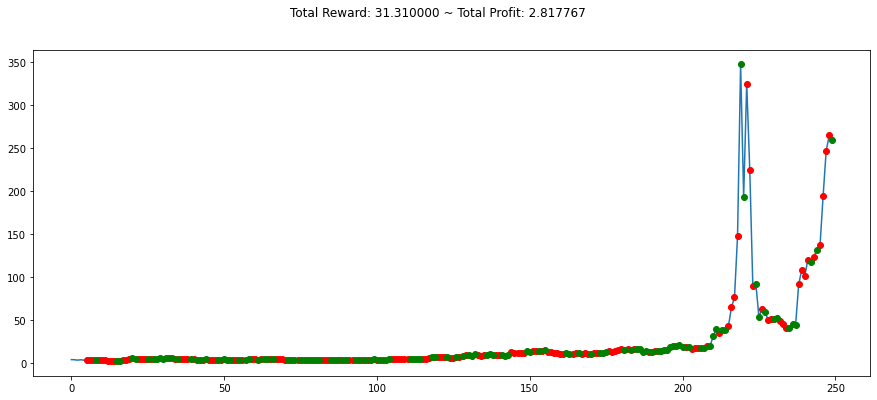

In [56]:
state = env.reset()
while True: 
    action = env.action_space.sample()
    n_state, reward, done, info = env.step(action)
    if done: 
        print("info", info)
        break
        
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

# 2.1 Add Custom Indicators

## 2.1.1. Install and Import New Dependencies

In [57]:
from gym_anytrading.envs import StocksEnv#customer overlay(customiz env to able add indicators)
from finta import TA#technical indicators

## 2.1.2. Fix Volume Column

In [58]:
df['Volume']

Date
2020-03-16     4,866,696
2020-03-17     3,562,210
2020-03-18     3,651,709
2020-03-19     5,039,539
2020-03-20     7,722,194
                 ...    
2021-03-08    63,565,621
2021-03-09    39,099,328
2021-03-10    71,570,570
2021-03-11    28,312,490
2021-03-12    25,845,900
Name: Volume, Length: 251, dtype: object

In [59]:
df['Volume'] = df['Volume'].apply(lambda x: float(x.replace(",", "")))

In [60]:
df.dtypes

Open      float64
High      float64
Low       float64
Close     float64
Volume    float64
dtype: object

## 2.1.3. Calculate SMA, RSI and OBV

In [61]:
df['SMA'] = TA.SMA(df, 12)#12- no of period we want from simple moving avg
df['RSI'] = TA.RSI(df)
df['OBV'] = TA.OBV(df)
df.fillna(0, inplace=True) 

In [62]:
df.head(15)

,Open,High,Low,Close,Volume,SMA,RSI,OBV
Date,,,,,,,,
2020-03-16,3.93,4.57,3.90,4.37,4866696.0,0.000000,0.000000,0.0
2020-03-17,4.40,4.65,4.11,4.23,3562210.0,0.000000,0.000000,-3562210.0
2020-03-18,4.10,4.25,3.50,3.77,3651709.0,0.000000,0.000000,-7213919.0
2020-03-19,3.71,4.20,3.55,4.19,5039539.0,0.000000,43.394834,-2174380.0
2020-03-20,4.08,4.08,3.65,3.76,7722194.0,0.000000,29.351457,-9896574.0
2020-03-23,3.58,3.86,3.50,3.81,6009784.0,0.000000,32.102964,-3886790.0
2020-03-24,3.95,4.21,3.89,4.16,6805659.0,0.000000,47.512950,2918869.0
2020-03-25,4.15,4.49,4.04,4.17,3592059.0,0.000000,47.876947,6510928.0
2020-03-26,4.24,4.71,4.24,4.41,6210979.0,0.000000,55.799557,12721907.0


## 2.1.4. Create New Environments

In [63]:

def add_signals(env):
    start = env.frame_bound[0] - env.window_size #grabing the first inex
    end = env.frame_bound[1]#grabing the ending indexes
    prices = env.df.loc[:, 'Low'].to_numpy()[start:end]#prices from start to end
    signal_features = env.df.loc[:, ['Low', 'Volume','SMA', 'RSI', 'OBV']].to_numpy()[start:end]#
    return prices, signal_features

In [64]:
#custom env
class MyCustomEnv(StocksEnv):
    _process_data = add_signals #native function in stock trading env
    #over write it with add_signals
#creating new instance    
env2 = MyCustomEnv(df=df, window_size=12, frame_bound=(12,50))

In [65]:
type(env2)

__main__.MyCustomEnv

In [66]:
df.head()

,Open,High,Low,Close,Volume,SMA,RSI,OBV
Date,,,,,,,,
2020-03-16,3.93,4.57,3.90,4.37,4866696.0,0.0,0.000000,0.0
2020-03-17,4.40,4.65,4.11,4.23,3562210.0,0.0,0.000000,-3562210.0
2020-03-18,4.10,4.25,3.50,3.77,3651709.0,0.0,0.000000,-7213919.0
2020-03-19,3.71,4.20,3.55,4.19,5039539.0,0.0,43.394834,-2174380.0
2020-03-20,4.08,4.08,3.65,3.76,7722194.0,0.0,29.351457,-9896574.0


# 3. Build Environment and Train

In [67]:
env_maker = lambda: env2
env = DummyVecEnv([env_maker])

In [68]:
type(env_maker)

function

In [74]:
model = A2C('MlpPolicy', env, verbose=1) 
agent = model.learn(total_timesteps=200000)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 39       |
|    ep_rew_mean        | 1.38     |
| time/                 |          |
|    fps                | 721      |
|    iterations         | 100      |
|    time_elapsed       | 0        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -0.651   |
|    explained_variance | 0.239    |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | 0.0844   |
|    value_loss         | 0.0153   |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 39       |
|    ep_rew_mean        | 1.16     |
| time/                 |          |
|    fps                | 742      |
|    iterations         | 200      |
|    time_elapsed 

# 4. Evaluation

In [75]:
env = MyCustomEnv(df=df, window_size=12, frame_bound=(80,120))
obs = env.reset()
while True: 
    obs = obs[np.newaxis, ...]
    action, _states = agent.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break

info {'total_reward': 3.089999999999999, 'total_profit': 1.612137363343052, 'position': 0}


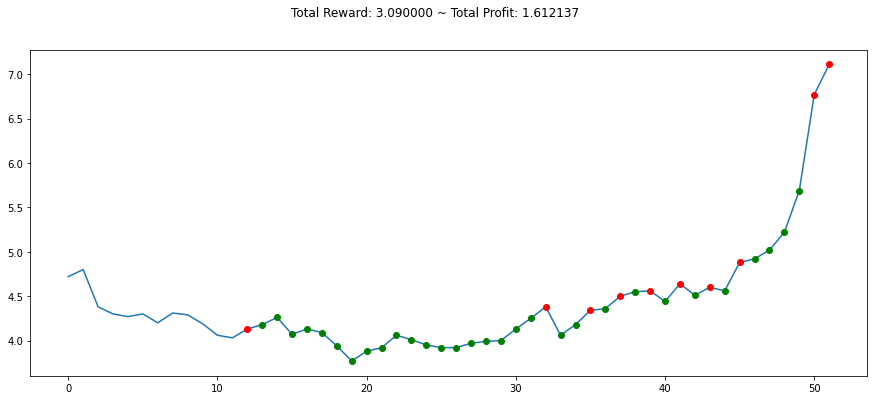

In [76]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

In [72]:
#with open(os.getcwd()+'/agent.pickle','wb') as f:
#    pickle.dump(model, f, pickle.HIGHEST_PROTOCOL)  


In [78]:
agent.save("model") 